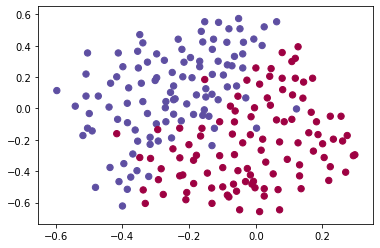

In [1]:
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline

data = scipy.io.loadmat('data.mat')
train_X = data['X'].T
train_y = data['y'].T
test_X = data['Xval'].T
test_y = data['yval'].T

plt.scatter(train_X[0, :], train_X[1, :], c=train_y[0, :], s=40, cmap=plt.cm.Spectral);

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
Train on 168 samples, validate on 43 samples
Epoch 1/100
168/168 [==============================] - 0s 1ms/step - loss: 0.6733 - accuracy: 0.7321 - val_loss: 0.6756 - val_accuracy: 0.6744
Epoch 2/100
168/168 [==============================] - 0s 133us/step - loss: 0.6567 - accuracy: 0.8214 - val_loss: 0.6692 - val_accuracy: 0.6744
Epoch 3/100
168/168 [==============================] 

Epoch 52/100
168/168 [==============================] - 0s 129us/step - loss: 0.2139 - accuracy: 0.9107 - val_loss: 0.3922 - val_accuracy: 0.8140
Epoch 53/100
168/168 [==============================] - 0s 119us/step - loss: 0.2133 - accuracy: 0.9226 - val_loss: 0.3942 - val_accuracy: 0.8140
Epoch 54/100
168/168 [==============================] - 0s 116us/step - loss: 0.2130 - accuracy: 0.9226 - val_loss: 0.3928 - val_accuracy: 0.8140
Epoch 55/100
168/168 [==============================] - 0s 116us/step - loss: 0.2124 - accuracy: 0.9226 - val_loss: 0.3890 - val_accuracy: 0.8140
Epoch 56/100
168/168 [==============================] - 0s 135us/step - loss: 0.2122 - accuracy: 0.9167 - val_loss: 0.3915 - val_accuracy: 0.8140
Epoch 57/100
168/168 [==============================] - 0s 121us/step - loss: 0.2127 - accuracy: 0.9226 - val_loss: 0.3900 - val_accuracy: 0.8140
Epoch 58/100
168/168 [==============================] - 0s 118us/step - loss: 0.2125 - accuracy: 0.9226 - val_loss: 0.3868 -

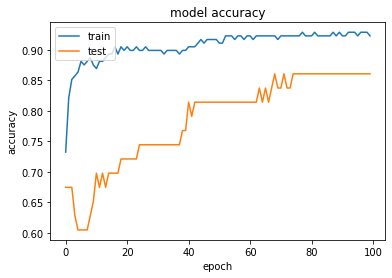

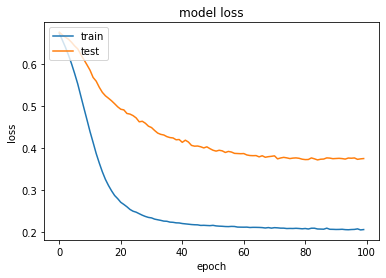

In [2]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(10, input_dim=2, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.summary()

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(data['X'],data['y'], epochs=100, batch_size=10, validation_split=0.2)

_, accuracy = model.evaluate(data['X'], data['y'])
print("Model accuracy: %.2f"% (accuracy*100))


# Accuracy for the test data
predictions = model.predict(data['Xval'])
# print([round(x[0]) for x in predictions])

score = model.evaluate(data['Xval'], data['yval'],verbose=1)
print("Model accuracy for Test data:",score)


history_dict = history.history
print(history_dict.keys())


# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


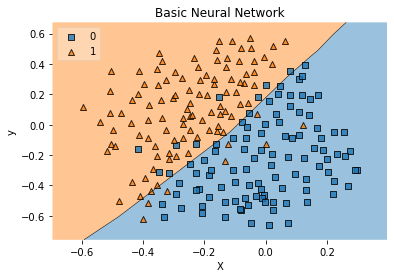

In [3]:
# Decision boundary based on training data without regularization
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt


X = data['X']
y = data['y'].T


# Plotting decision regions
plot_decision_regions(X, y[0], clf=model, legend=2, zoom_factor=10.0)

# Adding axes annotations
plt.xlabel('X')
plt.ylabel('y')
plt.title('Basic Neural Network')
plt.show()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 60)                180       
_________________________________________________________________
dense_5 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_6 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 31        
Total params: 2,971
Trainable params: 2,971
Non-trainable params: 0
_________________________________________________________________
Train on 168 samples, validate on 43 samples
Epoch 1/100
168/168 [==============================] - 0s 1ms/step - loss: 0.8410 - accuracy: 0.6905 - val_loss: 0.7631 - val_accuracy: 0.7209
Epoch 2/100
168/168 [==============================] - 0s 133u

Epoch 51/100
168/168 [==============================] - 0s 126us/step - loss: 0.2404 - accuracy: 0.9167 - val_loss: 0.4140 - val_accuracy: 0.9302
Epoch 52/100
168/168 [==============================] - 0s 122us/step - loss: 0.2391 - accuracy: 0.9107 - val_loss: 0.4258 - val_accuracy: 0.8605
Epoch 53/100
168/168 [==============================] - 0s 117us/step - loss: 0.2429 - accuracy: 0.9286 - val_loss: 0.4100 - val_accuracy: 0.8605
Epoch 54/100
168/168 [==============================] - 0s 117us/step - loss: 0.2433 - accuracy: 0.8929 - val_loss: 0.3428 - val_accuracy: 0.8605
Epoch 55/100
168/168 [==============================] - 0s 119us/step - loss: 0.2334 - accuracy: 0.9405 - val_loss: 0.4359 - val_accuracy: 0.8837
Epoch 56/100
168/168 [==============================] - 0s 116us/step - loss: 0.2736 - accuracy: 0.8929 - val_loss: 0.4760 - val_accuracy: 0.8605
Epoch 57/100
168/168 [==============================] - 0s 119us/step - loss: 0.2502 - accuracy: 0.9048 - val_loss: 0.4421 -

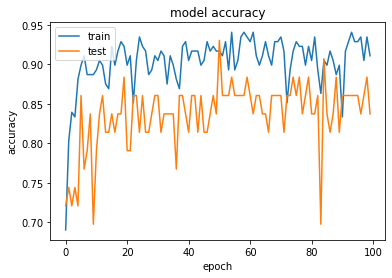

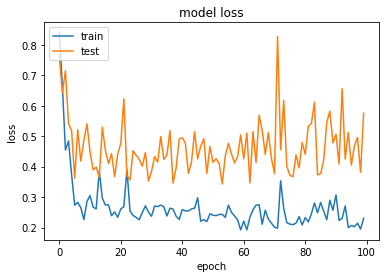

In [4]:
# L2 Regularization
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from keras.optimizers import SGD

model_l2 = Sequential()
model_l2.add(Dense(60, input_dim=2, activation="relu"))
model_l2.add(Dense(30, activation="relu"))
model_l2.add(Dense(30,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_l2.add(Dense(1, activation="sigmoid"))

model_l2.summary()

sgd = SGD(learning_rate=0.1, momentum=0.9)

model_l2.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["accuracy"])
history = model_l2.fit(data['X'],data['y'], epochs=100, batch_size=10, validation_split=0.2)

_, accuracy = model_l2.evaluate(data['X'], data['y'])
print("Model accuracy: %.2f"% (accuracy*100))


# Accuracy for the test data
predictions = model_l2.predict(data['Xval'])
# print([round(x[0]) for x in predictions])

score = model_l2.evaluate(data['Xval'], data['yval'],verbose=1)
print("Model accuracy for Test data:",score)


history_dict = history.history
print(history_dict.keys())


# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


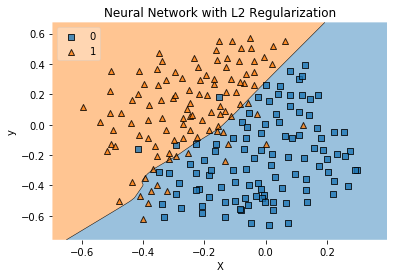

In [5]:
# Decision boundary with L2 Regularization
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt


X = data['X']
y = data['y'].T


# Plotting decision regions
plot_decision_regions(X, y[0], clf=model_l2, legend=2, zoom_factor=10.0)

# Adding axes annotations
plt.xlabel('X')
plt.ylabel('y')
plt.title('Neural Network with L2 Regularization')
plt.show()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 60)                180       
_________________________________________________________________
dense_9 (Dense)              (None, 30)                1830      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 31        
Total params: 2,041
Trainable params: 2,041
Non-trainable params: 0
_________________________________________________________________
Train on 168 samples, validate on 43 samples
Epoch 1/200
168/168 [==============================] - 0s 1ms/step - loss: 0.5771 - accuracy: 0.7500 - val_loss: 0.6317 - val_accuracy: 0.5581
Epoch 2/200
168/168 [==============================] - 0s 124u

Epoch 51/200
168/168 [==============================] - 0s 131us/step - loss: 0.2220 - accuracy: 0.9226 - val_loss: 0.3799 - val_accuracy: 0.8372
Epoch 52/200
168/168 [==============================] - 0s 113us/step - loss: 0.2129 - accuracy: 0.9286 - val_loss: 0.4298 - val_accuracy: 0.8140
Epoch 53/200
168/168 [==============================] - 0s 114us/step - loss: 0.1726 - accuracy: 0.9345 - val_loss: 0.5051 - val_accuracy: 0.8372
Epoch 54/200
168/168 [==============================] - 0s 112us/step - loss: 0.2098 - accuracy: 0.8929 - val_loss: 0.5315 - val_accuracy: 0.7907
Epoch 55/200
168/168 [==============================] - 0s 132us/step - loss: 0.2177 - accuracy: 0.9107 - val_loss: 0.4211 - val_accuracy: 0.8605
Epoch 56/200
168/168 [==============================] - 0s 123us/step - loss: 0.1928 - accuracy: 0.9226 - val_loss: 0.3933 - val_accuracy: 0.8605
Epoch 57/200
168/168 [==============================] - 0s 124us/step - loss: 0.2273 - accuracy: 0.9048 - val_loss: 0.3542 -

168/168 [==============================] - 0s 119us/step - loss: 0.1579 - accuracy: 0.9405 - val_loss: 0.3409 - val_accuracy: 0.9070
Epoch 108/200
168/168 [==============================] - 0s 112us/step - loss: 0.1626 - accuracy: 0.9345 - val_loss: 0.5675 - val_accuracy: 0.8140
Epoch 109/200
168/168 [==============================] - 0s 118us/step - loss: 0.1736 - accuracy: 0.9345 - val_loss: 0.4674 - val_accuracy: 0.8605
Epoch 110/200
168/168 [==============================] - 0s 114us/step - loss: 0.1721 - accuracy: 0.9464 - val_loss: 0.4134 - val_accuracy: 0.9070
Epoch 111/200
168/168 [==============================] - 0s 115us/step - loss: 0.1712 - accuracy: 0.9286 - val_loss: 0.4502 - val_accuracy: 0.8605
Epoch 112/200
168/168 [==============================] - 0s 120us/step - loss: 0.1864 - accuracy: 0.9345 - val_loss: 0.5113 - val_accuracy: 0.8372
Epoch 113/200
168/168 [==============================] - 0s 115us/step - loss: 0.2002 - accuracy: 0.9345 - val_loss: 0.3608 - val_ac

Epoch 163/200
168/168 [==============================] - 0s 121us/step - loss: 0.1734 - accuracy: 0.9464 - val_loss: 0.4706 - val_accuracy: 0.8140
Epoch 164/200
168/168 [==============================] - 0s 117us/step - loss: 0.1699 - accuracy: 0.9345 - val_loss: 0.4830 - val_accuracy: 0.8140
Epoch 165/200
168/168 [==============================] - 0s 114us/step - loss: 0.1993 - accuracy: 0.8988 - val_loss: 0.4939 - val_accuracy: 0.8605
Epoch 166/200
168/168 [==============================] - 0s 111us/step - loss: 0.1596 - accuracy: 0.9405 - val_loss: 0.4010 - val_accuracy: 0.8837
Epoch 167/200
168/168 [==============================] - 0s 111us/step - loss: 0.1454 - accuracy: 0.9464 - val_loss: 0.4915 - val_accuracy: 0.8140
Epoch 168/200
168/168 [==============================] - 0s 108us/step - loss: 0.1442 - accuracy: 0.9405 - val_loss: 0.4482 - val_accuracy: 0.8837
Epoch 169/200
168/168 [==============================] - 0s 140us/step - loss: 0.1748 - accuracy: 0.9345 - val_loss: 0

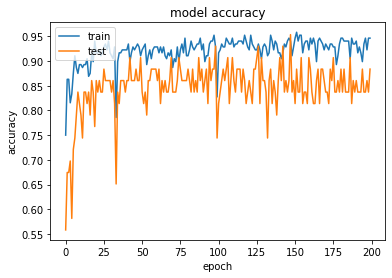

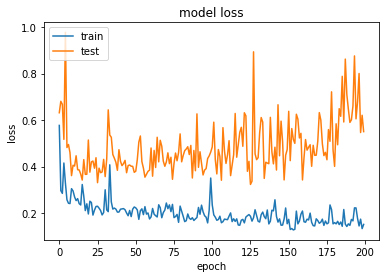

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model_dropout = Sequential()
model_dropout.add(Dense(60, input_dim=2, activation="relu"))
model_dropout.add(Dense(30, activation="relu"))
model_dropout.add(Dropout(0.1))
model_dropout.add(Dense(1, activation="sigmoid"))

model_dropout.summary()

sgd = SGD(learning_rate=0.1, momentum=0.9)


model_dropout.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["accuracy"])
history = model_dropout.fit(data['X'],data['y'], epochs=200, batch_size=10, validation_split=0.2)

_, accuracy = model_dropout.evaluate(data['X'], data['y'])
print("Model accuracy: %.2f"% (accuracy*100))


# Accuracy for the test data
predictions = model_dropout.predict(data['Xval'])
# print([round(x[0]) for x in predictions])

score = model_dropout.evaluate(data['Xval'], data['yval'],verbose=1)
print("Model accuracy for Test data:",score)


history_dict = history.history
print(history_dict.keys())


# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


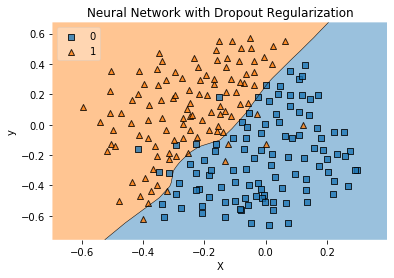

In [7]:
# Decision boundary with Dropout Regularization
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt


X = data['X']
y = data['y'].T


# Plotting decision regions
plot_decision_regions(X, y[0], clf=model_dropout, legend=2, zoom_factor=10.0)

# Adding axes annotations
plt.xlabel('X')
plt.ylabel('y')
plt.title('Neural Network with Dropout Regularization')
plt.show()

### 1. Decision boundaries between non-regularization and L2 regularization clearly suggests that the boundary is pushed to the left of -0.6 for L2 giving better accuracy and loss values.

### 2.Decision boundaries between non-regularization and Dropout regularization clearly suggests that the boundary is pushed to the right of -0.6 for Dropout giving better accuracy and loss values. Also fewer oranges in the blue domain space. Dropout performed much better than L2 here. Dropout gave 93% accuracy which is a significant improvement.
